# Testing DRFL algorithm

The purpose of this paper consists on testing about how is working the implemented algorithm.

This algorithm works with time series, taking as input a pd.Series data


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main import DRFL
import random
import matplotlib.cm as cm


# Creating and Visualizing Easy Time-Series

Let's create a time series for detecting two target routines. Each routine will have a noise parameter (to give more realism) 

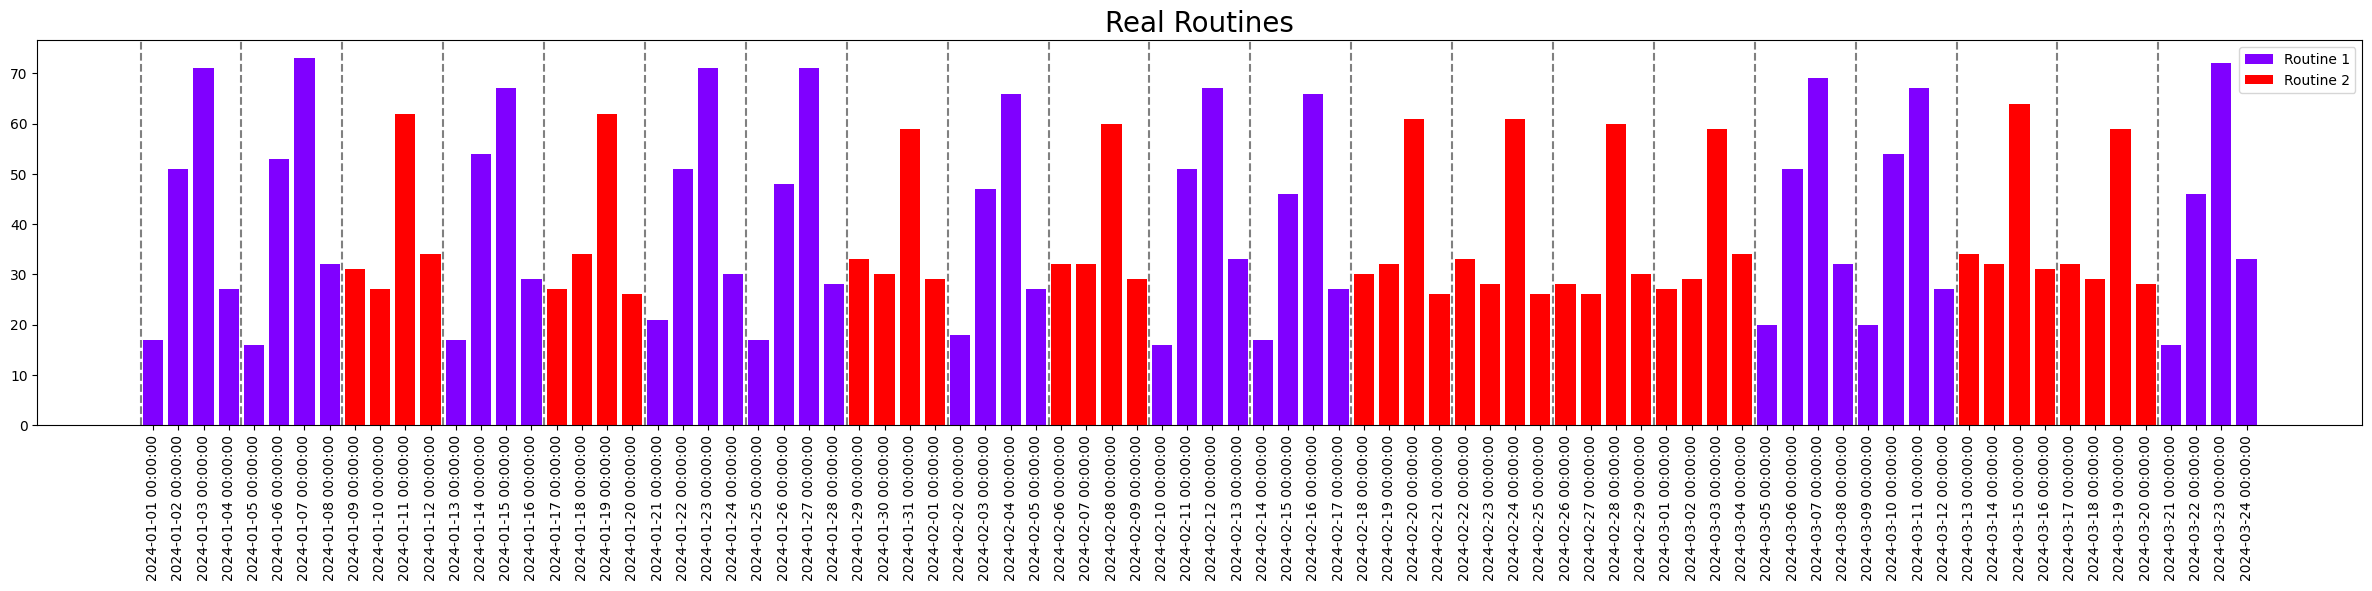

In [53]:
# PARAMS
target_routine_1 = [20, 50, 70, 30]
target_routine_2 = [30, 30, 60, 30]
noise_threshold_minutes = 4
T_max = 21
idx_routine1 = [0,1,3,5,6,8,10,11,16,17,20]

def randomized_routine(routine, noise_threshold):
    return [random.randint(x-noise_threshold, x+noise_threshold) for x in routine]

def get_colors(idx_routine):
    base_colors = cm.rainbow(np.linspace(0, 1, 2))
    colores = []
    for x in range(T_max):
        if x in idx_routine:
            for y in range(len(target_routine_1)):
                colores.append(base_colors[0])
        else:
            for y in range(len(target_routine_1)):
                colores.append(base_colors[1])
    return colores


def plot_groundtruth():
    ts = np.array(time_series)
    # Plotting the bar chart with vertical lines every 4 bars
    plt.figure(figsize=(30,5))
    bars = plt.bar(x=[x for x in range(len(ts))], height=ts, color=get_colors(idx_routine1))

    # Draw a vertical line every four bars
    for i in range(0, len(ts), len(target_routine_1)):
        plt.axvline(x=i-0.5, color='grey', linestyle='--')
    plt.xticks(ticks=[x for x in range(len(ts))], labels=pd.date_range(start="2024-01-01", periods=len(ts)),
               rotation=90)
    # add_legend
    plt.legend([bars[0], bars[10]], ['Routine 1', 'Routine 2'])
    plt.title("Real Routines", fontsize=20)
    plt.show()


time_series = []
for x in range(T_max):
    if x in idx_routine1:
        random_1 = randomized_routine(target_routine_1, noise_threshold_minutes)
        for y in random_1:
            time_series.append(y)
    else:
        random_2 = randomized_routine(target_routine_2, noise_threshold_minutes)
        for y in random_2:
            time_series.append(y)
            
plot_groundtruth()

Reds owns to the routine target 1, and blues owns to routine target 2

In [54]:
time_series = pd.DataFrame(
    {
        "Date": pd.date_range(start="2024-01-01", periods=len(time_series)),
        "Time-Series": time_series
    }
).set_index("Date")["Time-Series"]

# Testing DRFL with OVERLAP (epsilon = 1)

Now that we have synthetised data, lets detect the routines with DRFL algorithm:

We'll use as fixed param: 
m = 4


In [55]:
routine_detector = DRFL(m=4, R=10, C=5, G=50, epsilon=1)
routine_detector.fit(time_series)
routine_detector.show_results()

Routines detected:  8
__________________________________________________
Centroid 1: [17.9 50.6 68.8 29.2]
Routine 1: [array([17, 51, 71, 27], dtype=int64), array([16, 53, 73, 32], dtype=int64), array([17, 54, 67, 29], dtype=int64), array([21, 51, 71, 30], dtype=int64), array([17, 48, 71, 28], dtype=int64), array([18, 47, 66, 27], dtype=int64), array([16, 51, 67, 33], dtype=int64), array([17, 46, 66, 27], dtype=int64), array([20, 51, 69, 32], dtype=int64), array([20, 54, 67, 27], dtype=int64)]
Date 1: [Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-01-13 00:00:00'), Timestamp('2024-01-21 00:00:00'), Timestamp('2024-01-25 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-10 00:00:00'), Timestamp('2024-02-14 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-03-09 00:00:00')]

 -------------------------------------------------- 

Centroid 2: [63.9 30.2 17.8 50.1]
Routine 2: [array([71, 27, 16, 53], dtype=int64), array([62, 34

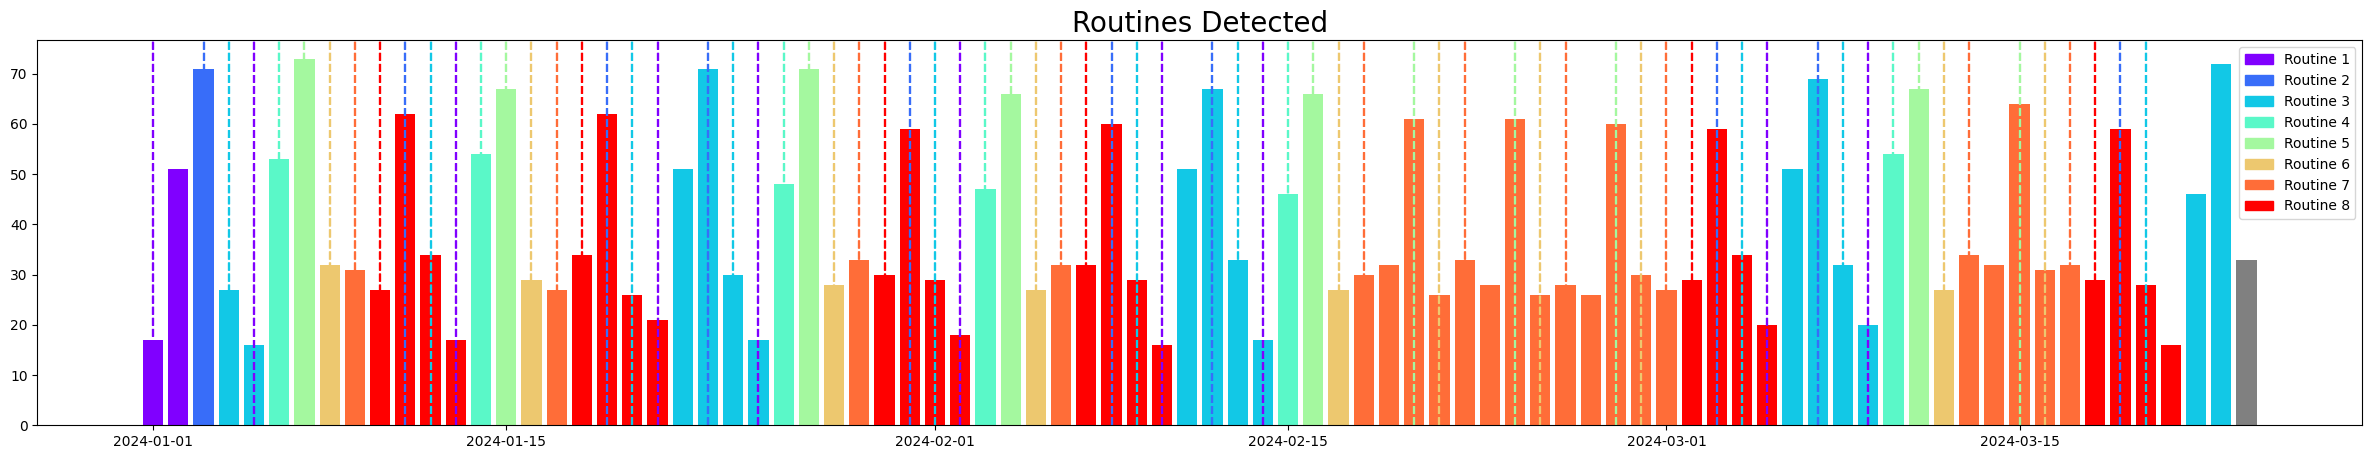

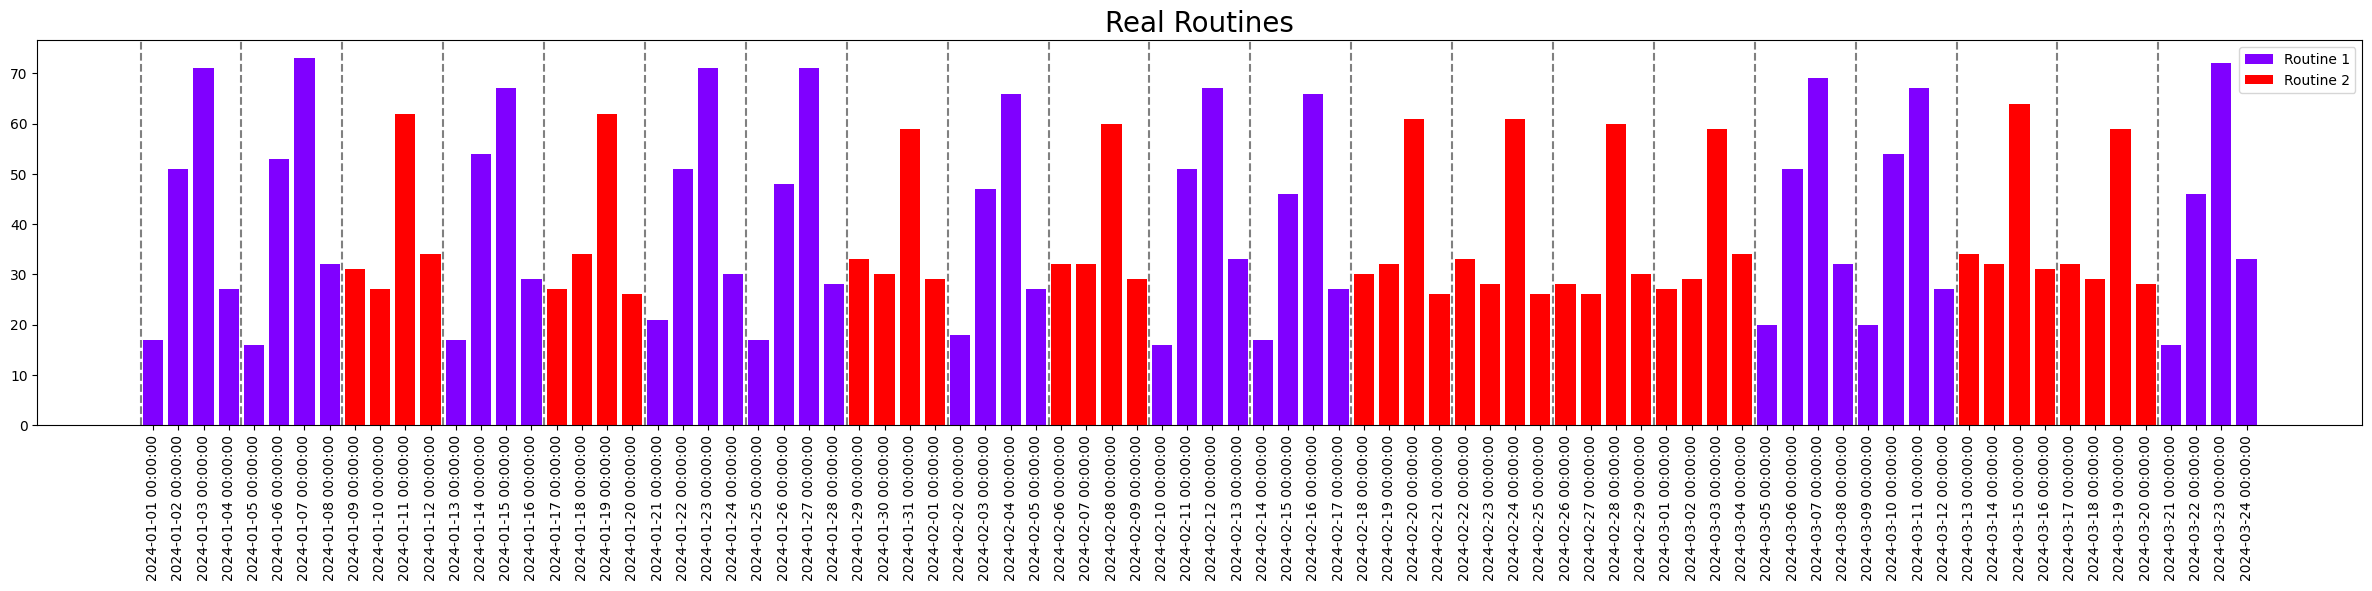

In [56]:
routine_detector.plot_results(
    title="Routines Detected",
    figsize=(30, 5),
    title_fontsize=20
)

plot_groundtruth()



# Testing DRFL with less Overlap (epsilon=0.5)

We see overlapping, so let's reduce the epsilon param to 0.5

In [57]:
routine_detector = DRFL(m=4, R=5, C=5, G=50, epsilon=0.5)
routine_detector.fit(time_series)
routine_detector.show_results()
routines_detected = routine_detector.get_results()

Routines detected:  2
__________________________________________________
Centroid 1: [17.9 50.6 68.8 29.2]
Routine 1: [array([17, 51, 71, 27], dtype=int64), array([16, 53, 73, 32], dtype=int64), array([17, 54, 67, 29], dtype=int64), array([21, 51, 71, 30], dtype=int64), array([17, 48, 71, 28], dtype=int64), array([18, 47, 66, 27], dtype=int64), array([16, 51, 67, 33], dtype=int64), array([17, 46, 66, 27], dtype=int64), array([20, 51, 69, 32], dtype=int64), array([20, 54, 67, 27], dtype=int64)]
Date 1: [Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-01-13 00:00:00'), Timestamp('2024-01-21 00:00:00'), Timestamp('2024-01-25 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-10 00:00:00'), Timestamp('2024-02-14 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-03-09 00:00:00')]

 -------------------------------------------------- 

Centroid 2: [31.25  29.125 60.5   30.125]
Routine 2: [array([31, 27, 62, 34], dtype=int64), array

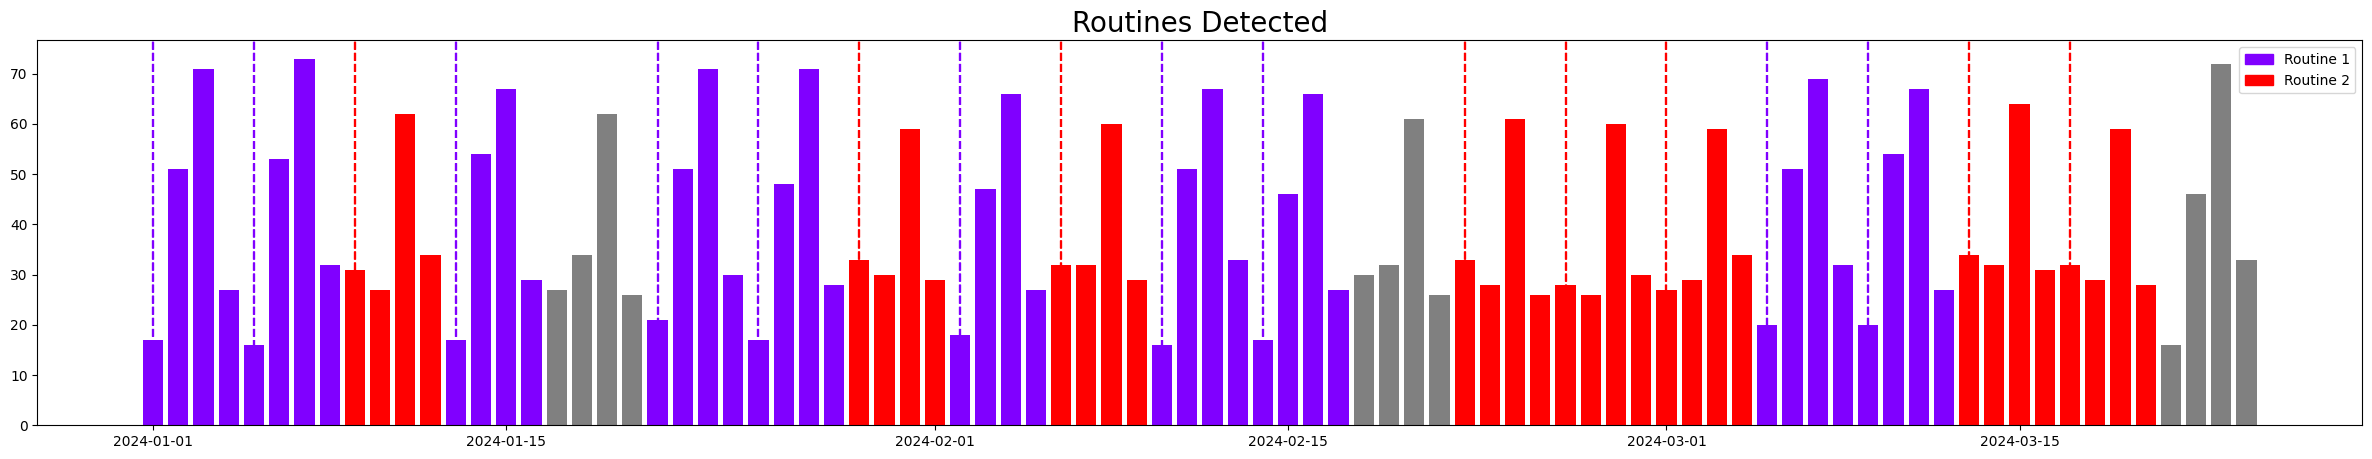

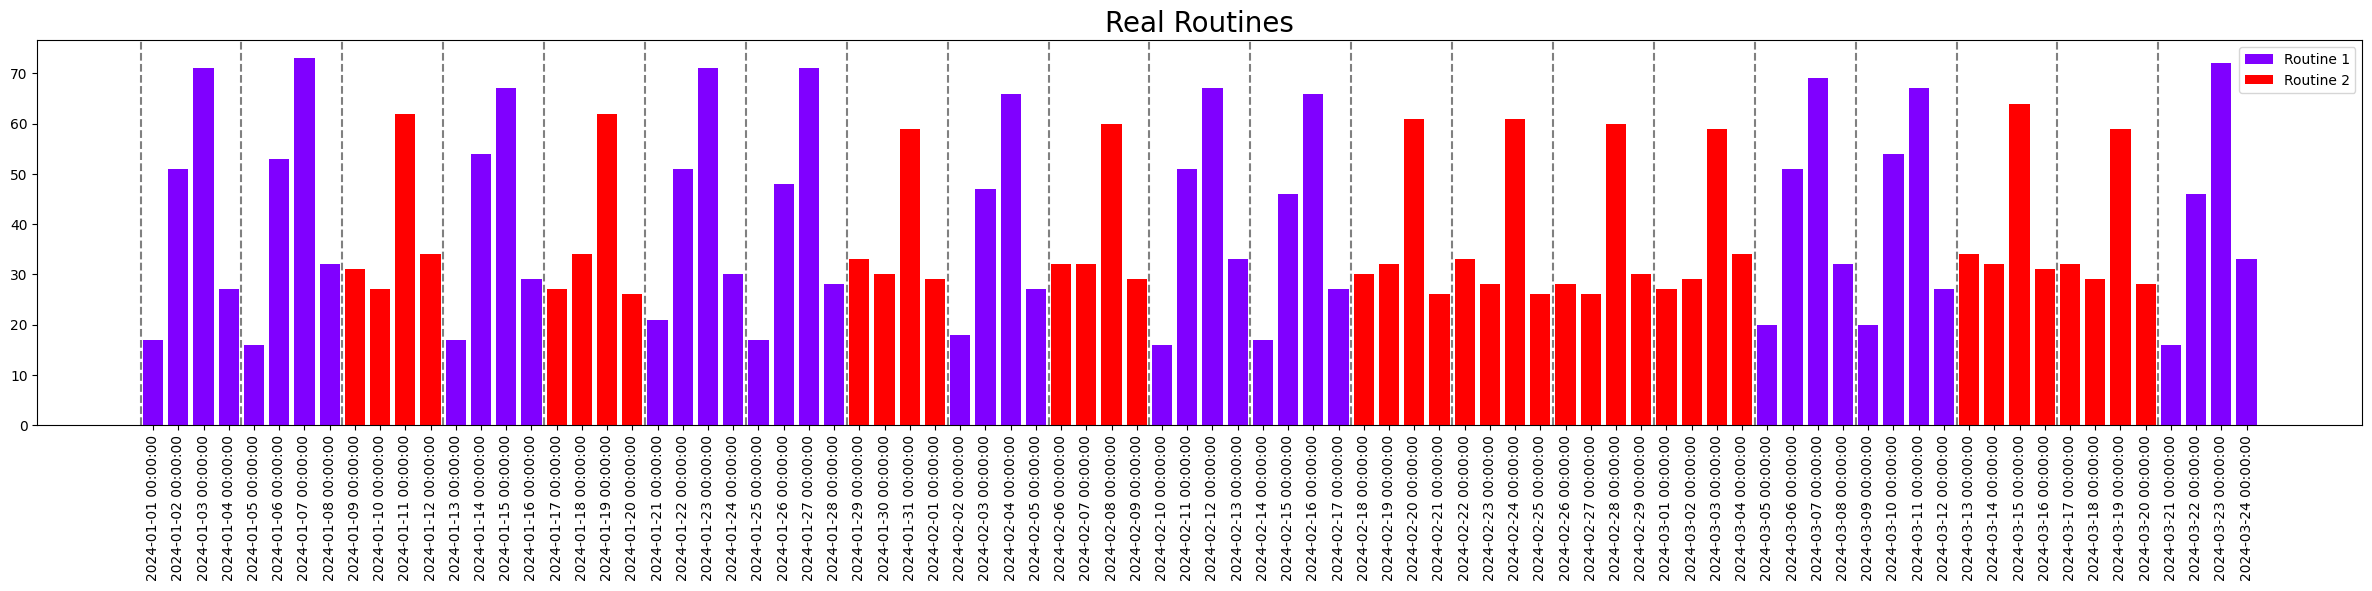

In [58]:
routine_detector.plot_results(
    title="Routines Detected",
    figsize=(30, 5),
    title_fontsize=20
)

plot_groundtruth()